In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import ensemble
%matplotlib inline

In [47]:
data = pd.read_csv("C:/Users/Acer/Desktop/ML/adult.csv")

In [48]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# # Cleaning Data and Imputing Miscoded Values

In [49]:
data.shape

(48842, 15)

In [50]:
que = ["?"]
data["workclass"] = data["workclass"].replace(que,np.nan)
data["occupation"] = data["occupation"].replace(que,np.nan)
data["native-country"] = data["native-country"].replace(que,np.nan)
data.head(7)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K


In [51]:
data['workclass'].fillna("Private",inplace=True)
data['occupation'].fillna("Prof-specialty",inplace=True)
data['native-country'].fillna("United-States",inplace=True)

In [52]:
data.head(7)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K


In [53]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# # Visualization of Numerical(quantitative) and Categorical variables 

In [54]:
categorical = data.select_dtypes(include = ["object"]).keys()
print(categorical)

Index([u'workclass', u'education', u'marital-status', u'occupation',
       u'relationship', u'race', u'gender', u'native-country', u'income'],
      dtype='object')


In [55]:
quantitative = data.select_dtypes(include = ["int64"]).keys()
print(quantitative)

Index([u'age', u'fnlwgt', u'educational-num', u'capital-gain', u'capital-loss',
       u'hours-per-week'],
      dtype='object')


In [56]:
data[quantitative].describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000016C29BA8>,
      dtype=object)

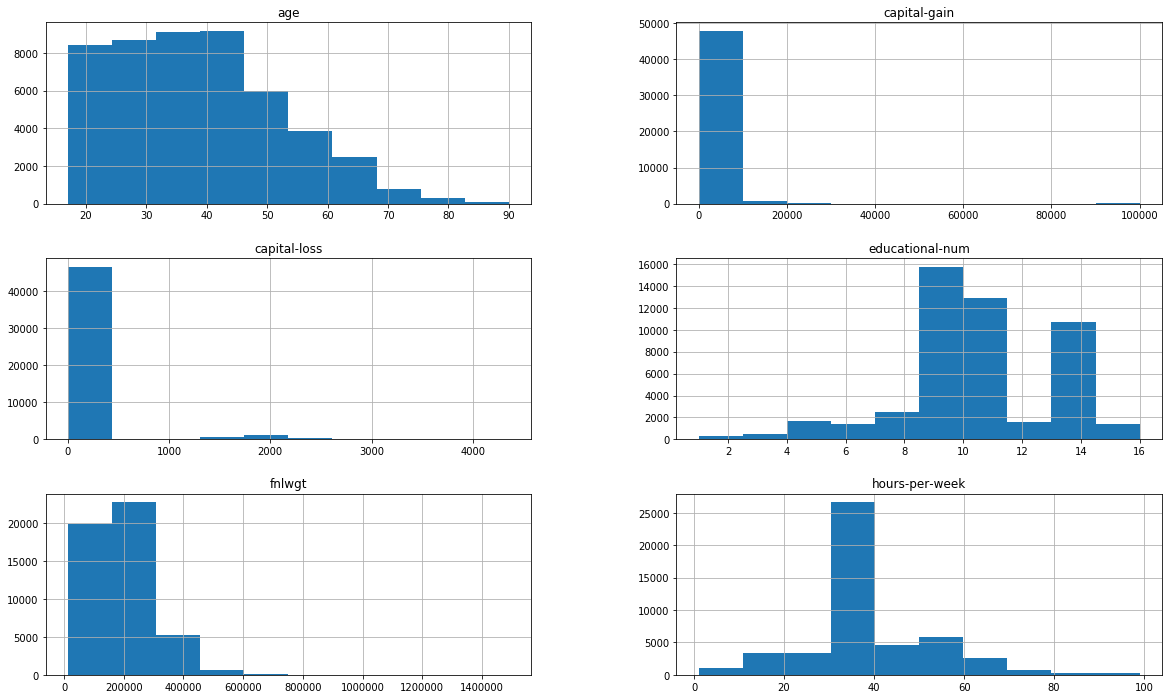

In [57]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 12
data[quantitative].hist()

## # Categorical variables - Feature engineering.

In [58]:
data.workclass.nunique(),data.education.nunique()

(8, 16)

In [59]:
data['marital-status'].nunique(),data.occupation.nunique()

(7, 14)

In [60]:
data['native-country'].nunique(),data.relationship.nunique()

(41, 6)

In [61]:
data.race.nunique(),data.gender.nunique(),data.income.nunique()

(5, 2, 2)

In [62]:
workclass_freq=pd.crosstab(index=data['workclass'],columns="count")  
workclass_freq_rel = workclass_freq/workclass_freq.sum() 
workclass_freq_rel.sort_values('count', ascending=False) #relative frequencies

col_0,count
workclass,
Private,0.751505
Self-emp-not-inc,0.079071
Local-gov,0.064207
State-gov,0.040559
Self-emp-inc,0.034704
Federal-gov,0.029319
Without-pay,0.000430
Never-worked,0.000205


In [63]:
def workclass_categorizer(row):
   row = str(row)
   category = ""
   if "Private" in row:
       category = 6
   elif "Self-emp-not-inc" in row:
       category = 5
   elif "Local-gov" in row:
       category = 4
   elif "State-gov" in row:
       category = 3
   elif "Self-emp-inc" in row:
       category = 2
   elif "Federal-gov" in row:
       category = 1 
   else:
       category = 0
   return category 

data["workclass"] = data.apply(lambda row:workclass_categorizer(row["workclass"]),axis=1)


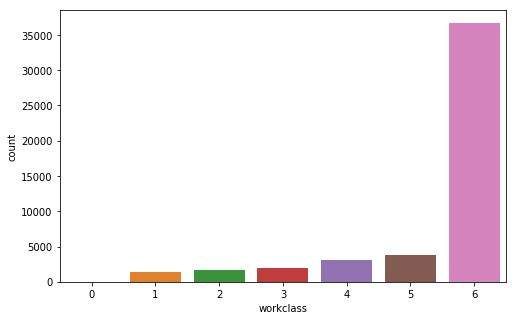

In [64]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(data['workclass'])

In [65]:
data = data.drop(data.columns[[7,8,13]],axis=1)
data.shape

(48842, 12)

In [66]:
education_freq=pd.crosstab(index=data['education'],columns="count")  
education_freq_rel = education_freq/education_freq.sum() 
education_freq_rel.sort_values('count', ascending=False)

col_0,count
education,
HS-grad,0.323164
Some-college,0.222718
Bachelors,0.164305
Masters,0.054400
Assoc-voc,0.042197
11th,0.037099
Assoc-acdm,0.032779
10th,0.028439
7th-8th,0.019553


In [67]:
def education_categorizer(row):
   row = str(row)
   category = ""
   if "HS-grad" in row:
       category = 14
   elif "Some-college" in row:
       category = 13
   elif "Bachelors" in row:
       category = 12
   elif "Masters" in row:
       category = 11
   elif "Assoc-voc" in row:
       category = 10
   elif "11th" in row:
       category = 9
   elif "Assoc-acdm" in row:
       category = 8 
   elif "10th" in row:
       category = 7 
   elif "7th-8th" in row:
       category = 6 
   elif "Poly-school" in row:
       category = 5
   elif "9th" in row:
       category = 4 
   elif "12th" in row:
       category = 3  
   elif "Doctorate" in row:
       category = 2 
   elif "5th-6th" in row:
       category = 1  
   else:
       category = 0
   return category 

data["education"] = data.apply(lambda row:education_categorizer(row["education"]),axis=1)

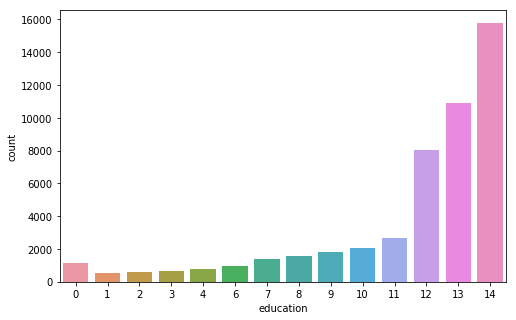

In [68]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(data['education'])

In [69]:
occupation_freq=pd.crosstab(index=data['occupation'],columns="count")  
occupation_freq_rel = occupation_freq/occupation_freq.sum() 
occupation_freq_rel.sort_values('count', ascending=False)

col_0,count
occupation,
Prof-specialty,0.183879
Craft-repair,0.125138
Exec-managerial,0.124606
Adm-clerical,0.114881
Sales,0.112690
Other-service,0.100794
Machine-op-inspct,0.061873
Transport-moving,0.048217
Handlers-cleaners,0.042423


In [70]:
def occupation_categorizer(row):
   row = str(row)
   category = ""
   if "Prof-specialty" in row:
       category = 12
   elif "Craft-repair" in row:
       category = 11
   elif "Exec-managerial" in row:
       category = 10
   elif "Adm-clerical" in row:
       category = 9
   elif "Sales" in row:
       category = 8
   elif "Other-service" in row:
       category = 7
   elif "Machine-op-inspct" in row:
       category = 6 
   elif "Transport-moving" in row:
       category = 5 
   elif "Handdlers-cleaners" in row:
       category = 4 
   elif "Farming-fishing" in row:
       category = 3
   elif "Tech-support" in row:
       category = 2 
   elif "Protective-serv" in row:
       category = 1    
   else:
       category = 0
   return category 

data["occupation"] = data.apply(lambda row:occupation_categorizer(row["occupation"]),axis=1)

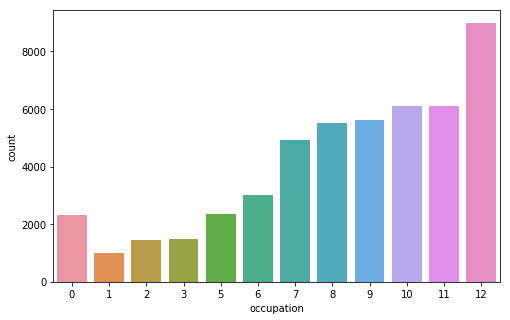

In [71]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(data['occupation'])

In [72]:
mrtlsts_freq=pd.crosstab(index=data['marital-status'],columns="count")  
mrtlsts_freq_rel = mrtlsts_freq/mrtlsts_freq.sum() 
mrtlsts_freq_rel.sort_values('count', ascending=False)

col_0,count
marital-status,
Married-civ-spouse,0.458192
Never-married,0.329982
Divorced,0.135805
Separated,0.031325
Widowed,0.031080
Married-spouse-absent,0.012858
Married-AF-spouse,0.000758


In [73]:
def mrtlsts_categorizer(row):
   row = str(row)
   category = ""
   if "Married-civ-spouse" in row:
       category = 5 
   elif "Never-married" in row:
       category = 4 
   elif "Divorced" in row:
       category = 3
   elif "Separated" in row:
       category = 2 
   elif "Widowed" in row:
       category = 1    
   else:
       category = 0
   return category 

data["marital-status"] = data.apply(lambda row:mrtlsts_categorizer(row["marital-status"]),axis=1)

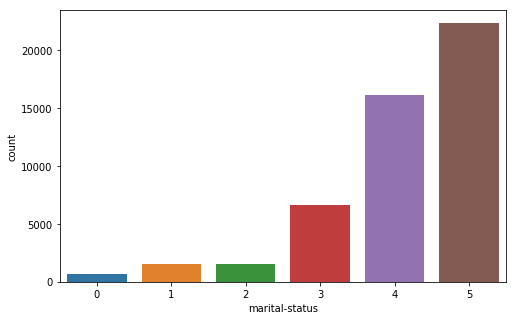

In [74]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(data['marital-status'])

In [75]:
data.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'educational-num',
       u'marital-status', u'occupation', u'gender', u'capital-gain',
       u'capital-loss', u'hours-per-week', u'income'],
      dtype='object')

In [76]:
data['gender'] = np.where(data['gender']=='Male', '1', '0')
data['gender'] = data['gender'].astype(dtype='int64')
data['income'] = np.where(data['income']=='>50K', '1', '0')
data['income'] = data['income'].astype(dtype='int64')
data.shape

(48842, 12)

# # EDA

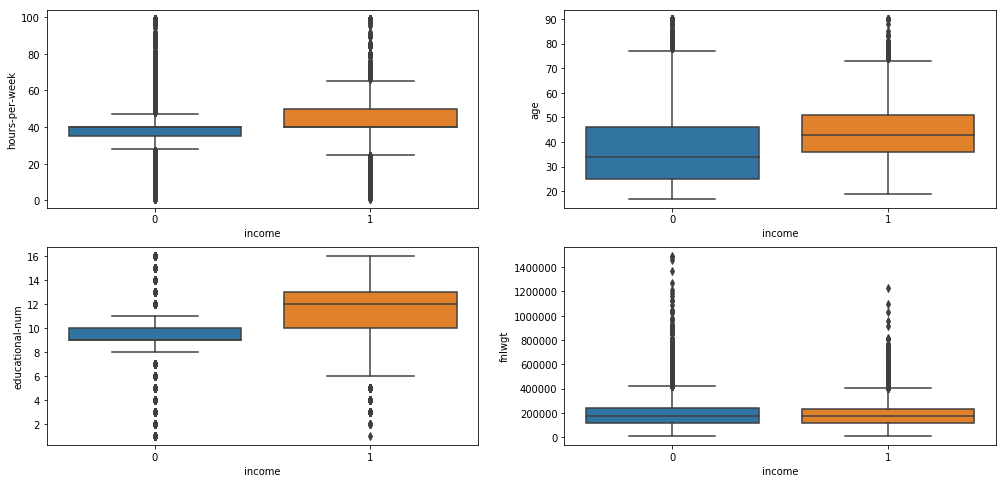

In [77]:
fig, ((a,b),(c,d))= plt.subplots(2,2, figsize=(17,8))
sns.boxplot(y='hours-per-week',x='income',data=data,ax=a)
sns.boxplot(y='age',x='income',data=data,ax=b)
sns.boxplot(y='educational-num',x='income',data=data,ax=c)
sns.boxplot(y='fnlwgt',x='income',data=data,ax=d)

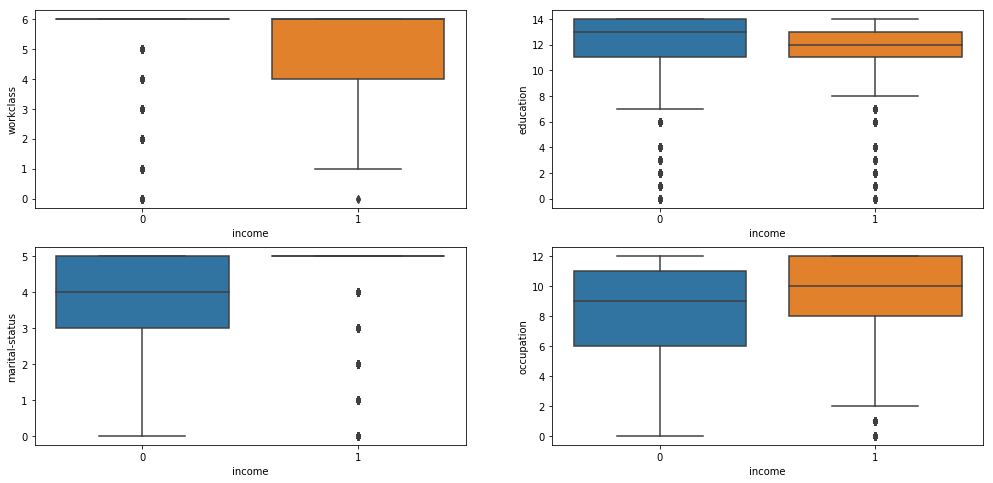

In [78]:
fig, ((p,q),(r,s))= plt.subplots(2,2, figsize=(17,8))
sns.boxplot(y='workclass',x='income',data=data,ax=p)
sns.boxplot(y='education',x='income',data=data,ax=q)
sns.boxplot(y='marital-status',x='income',data=data,ax=r)
sns.boxplot(y='occupation',x='income',data=data,ax=s)

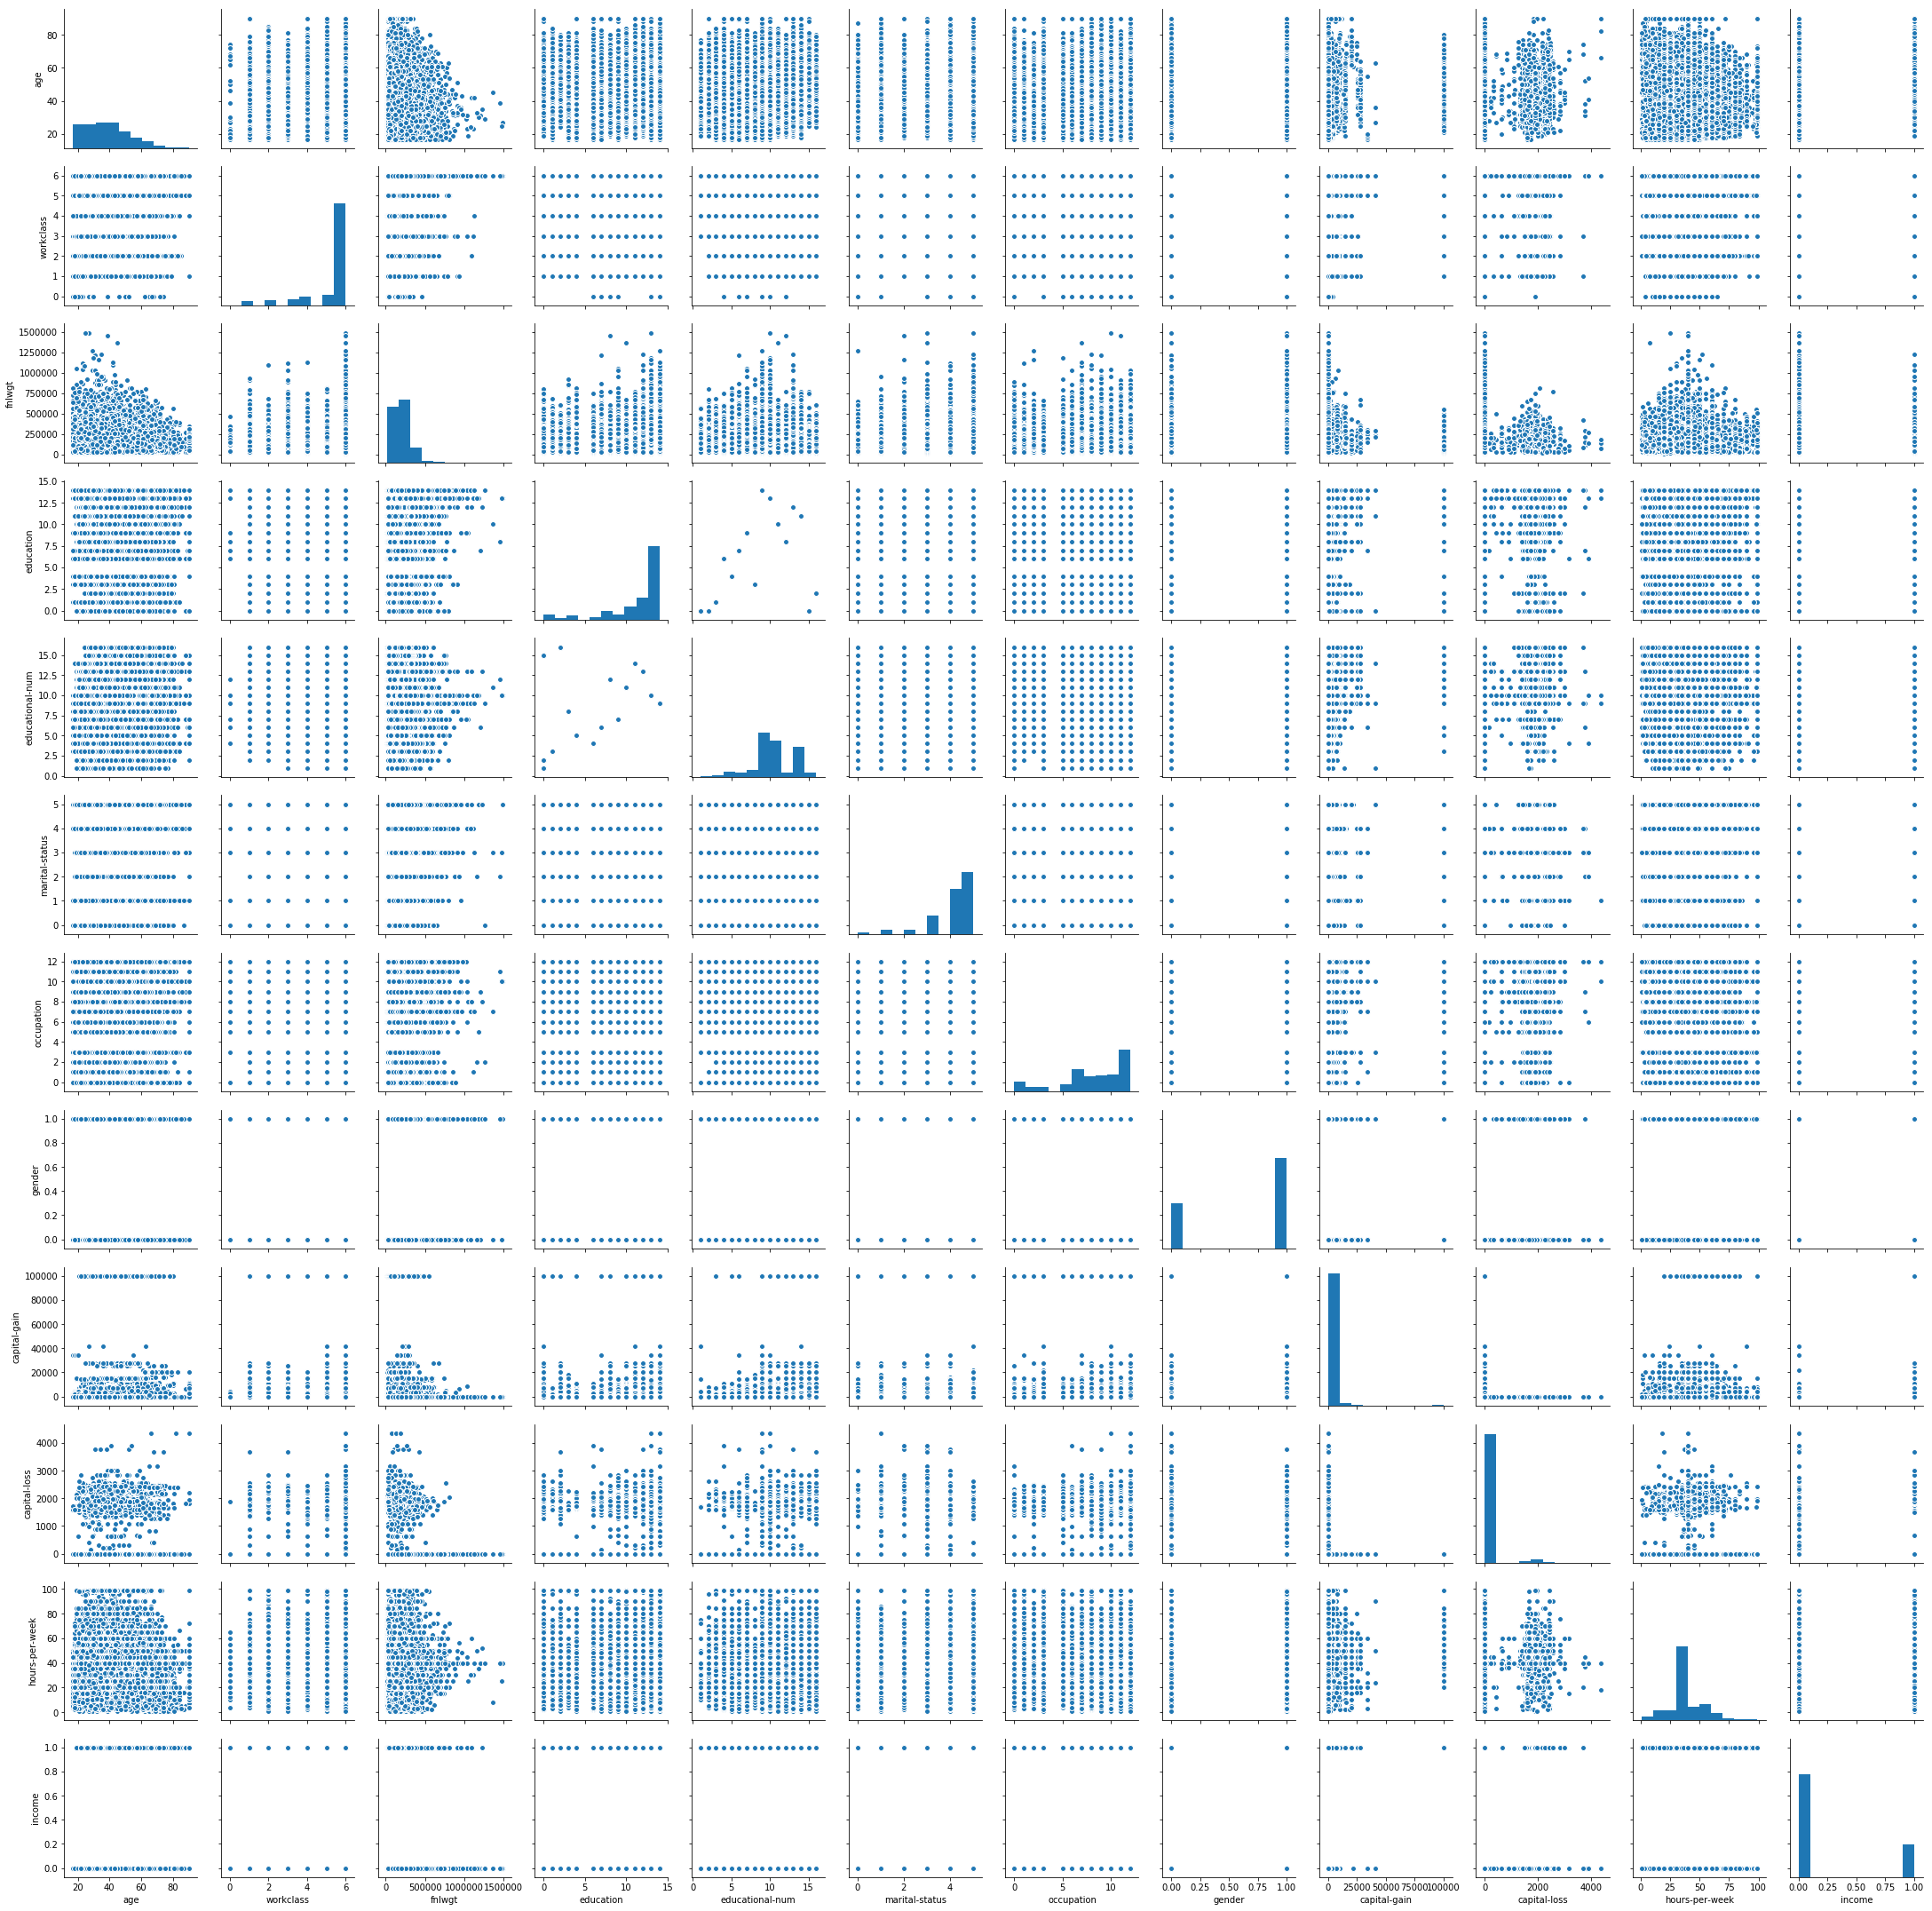

In [80]:
sns.pairplot(data)

# # EDA Report
#### * After performing EDA i had came to a conclusion that features like 'relationship','race' and 'native-country' no such correlation with the target variable 'INCOME' so, i removed them from the dataset.
#### * And there were also some categorical features in the dataset so i had converted them into numeical featured with which i can easily correlate the target variablee i.e, 'INCOME' .

# # Understanding correlation b/w different features

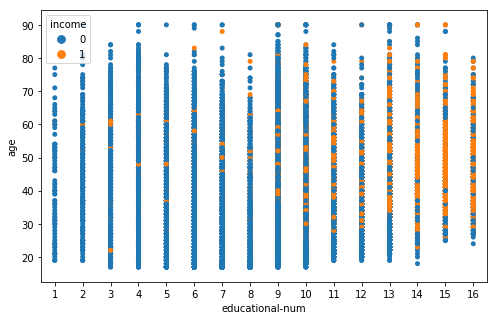

In [79]:
rcParams['figure.figsize'] = 8, 5
sns.stripplot(data['educational-num'],data['age'],hue=data['income'],data=data)

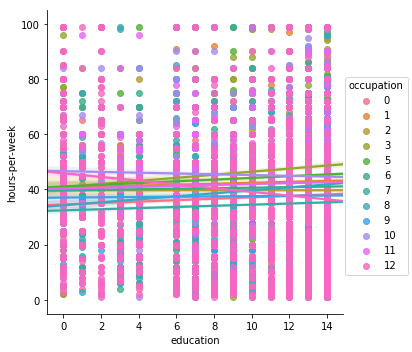

In [115]:
sns.lmplot(x="education", y="hours-per-week", data=data, hue="occupation")

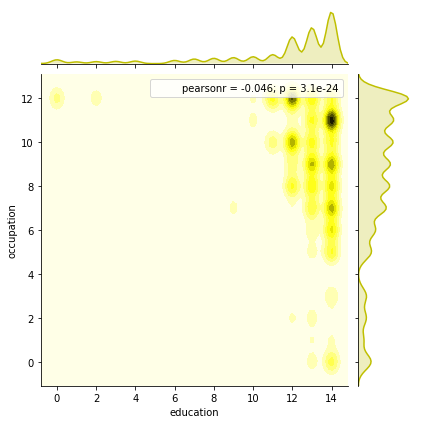

In [116]:
sns.jointplot(data['education'],data['occupation'],kind='kde',color='y',data=data)

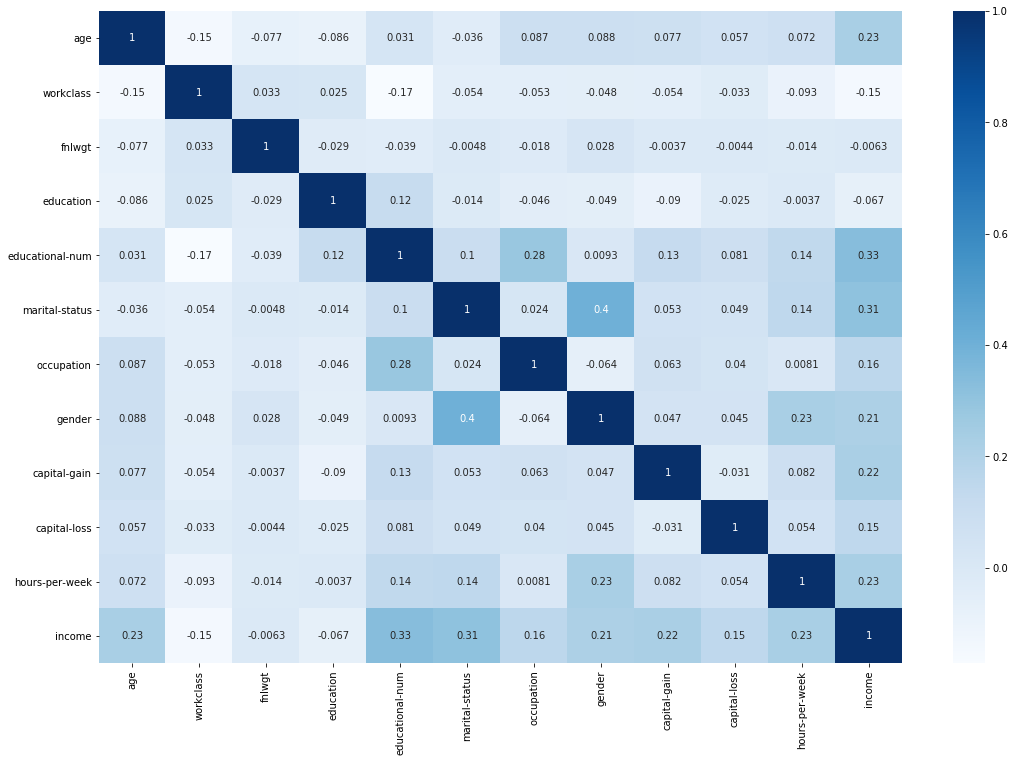

In [84]:
corr = data.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr,cmap='Blues',annot=True)

In [118]:
X = data.drop(['income'],axis=1)    
Y = data['income']

In [119]:
data.dtypes

age                int64
workclass          int64
fnlwgt             int64
education          int64
educational-num    int64
marital-status     int64
occupation         int64
gender             int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
income             int64
dtype: object

# # Feature engineering to extract the correct features for the model

In [120]:
X = (X-X.min())/(X.max()-X.min())
X.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,gender,capital-gain,capital-loss,hours-per-week
0,0.109589,1.000000,0.145129,0.642857,0.400000,0.8,0.500000,1.0,0.000000,0.0,0.397959
1,0.287671,1.000000,0.052451,1.000000,0.533333,1.0,0.250000,1.0,0.000000,0.0,0.500000
2,0.150685,0.666667,0.219649,0.571429,0.733333,1.0,0.083333,1.0,0.000000,0.0,0.397959
3,0.369863,1.000000,0.100153,0.928571,0.600000,1.0,0.500000,1.0,0.076881,0.0,0.397959
4,0.013699,1.000000,0.061708,0.928571,0.600000,0.8,1.000000,0.0,0.000000,0.0,0.295918


In [121]:
X.var()

age                0.035275
workclass          0.045268
fnlwgt             0.005104
education          0.059749
educational-num    0.029377
marital-status     0.048173
occupation         0.078239
gender             0.221618
capital-gain       0.005553
capital-loss       0.008559
hours-per-week     0.015988
dtype: float64

In [122]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(0.005)
X = selector.fit_transform(X)
X.shape,Y.shape

((48842L, 11L), (48842L,))

In [123]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.109589,1.000000,0.145129,0.642857,0.400000,0.8,0.500000,1.0,0.000000,0.0,0.397959
1,0.287671,1.000000,0.052451,1.000000,0.533333,1.0,0.250000,1.0,0.000000,0.0,0.500000
2,0.150685,0.666667,0.219649,0.571429,0.733333,1.0,0.083333,1.0,0.000000,0.0,0.397959
3,0.369863,1.000000,0.100153,0.928571,0.600000,1.0,0.500000,1.0,0.076881,0.0,0.397959
4,0.013699,1.000000,0.061708,0.928571,0.600000,0.8,1.000000,0.0,0.000000,0.0,0.295918


# # Building different classification models and comparing their accuracies

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

## Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state=5)
reg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=5, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
pred_lr = reg.predict(X_test)
lracc = reg.score(X_test,Y_test)*100
lracc

83.91851776026206

## Support Vector Machine

In [67]:
from sklearn import metrics
from sklearn.svm import SVC

In [68]:
model_SVM = SVC(C=1,gamma=10)

In [69]:
model_SVM.fit(X_train,Y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [70]:
pred_SVM = model_SVM.predict(X_test)

In [71]:
svmacc = metrics.accuracy_score(Y_test,pred_SVM)*100
svmacc

85.27996724332071

## Naive Bayes
### Gaussian NB

In [124]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [125]:
model_G_NB = GaussianNB()
model_G_NB.fit(X_train,Y_train)

GaussianNB(priors=None)

In [126]:
pred_G_NB = model_G_NB.predict(X_test)
gnbacc = metrics.accuracy_score(Y_test,pred_G_NB)*100
gnbacc

80.70426860477019

### BernoulliNB

In [127]:
from sklearn.naive_bayes import BernoulliNB

In [128]:
model_B_NB = BernoulliNB()
model_B_NB.fit(X_train,Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [129]:
pred_B_NB = model_B_NB.predict(X_test)
metrics.accuracy_score(Y_test,pred_B_NB)*100

79.02548879107381

## Decision Tree

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [131]:
a = DecisionTreeClassifier() #max_leaf_nodes=12 #random_state=1
a.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [132]:
a_pred = a.predict(X_test)
metrics.accuracy_score(Y_test,a_pred)*100

81.42082096427474

### Using Entropy

In [133]:
a1 = DecisionTreeClassifier(criterion="entropy") #max_leaf_nodes=12 #random_state=1
a1.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [134]:
a1_pred1 = a1.predict(X_test)
dtcacc = metrics.accuracy_score(Y_test,a1_pred1)*100
dtcacc

81.90193469137066

## Random Forest

In [135]:
b = RandomForestClassifier(max_leaf_nodes=14)
b.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=14,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [136]:
b_pred = b.predict(X_test)
metrics.accuracy_score(Y_test,b_pred)*100

85.51540587572934

### Using Entropy

In [137]:
b1 = RandomForestClassifier(criterion="entropy",max_leaf_nodes=14)
b1.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=14,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [138]:
b1_pred1 = b1.predict(X_test)
rfcacc = metrics.accuracy_score(Y_test,b1_pred1)*100
rfcacc

85.52564233800798

## Ensemble
### Bagging Classifier

In [72]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(max_samples=0.5,max_features=0.5)
bagging.fit(X_train,Y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=0.5, max_samples=0.5,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [73]:
pred_E_BC = bagging.predict(X_test)
metrics.accuracy_score(Y_test,pred_E_BC)*100

84.87050875217524

### Gradient Boosting Classifier

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
model_E_GBC = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0)
model_E_GBC.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [75]:
pred_E_GBC = model_E_GBC.predict(X_test)
gbcacc = metrics.accuracy_score(Y_test,pred_E_GBC)*100
gbcacc

86.73354488688709

In [76]:
df1 = pd.DataFrame({'Actual':Y_test,'Predicted':pred_E_GBC})
df1.head()

,Actual,Predicted
22294,0,0
17612,0,0
8924,1,1
40507,0,0
35766,0,0


### Voting Classifier

In [139]:
from sklearn.ensemble import VotingClassifier
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = SVC()

In [140]:
model_E_VC = VotingClassifier(estimators=[('DT',model1),('LR',model2),('SVC',model3)])
model_E_VC.fit(X_train,Y_train)

VotingClassifier(estimators=[('DT', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [141]:
pred_E_VC = model_E_VC.predict(X_test)
metrics.accuracy_score(Y_test,pred_E_VC)*100

C:\Users\Acer\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


84.3791585628007

## K Nearest Neighbors

In [142]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=15)
model_KNN.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [143]:
pred_KNN = model_KNN.predict(X_test)
knnacc = model_KNN.score(X_test,Y_test)*100
knnacc

83.8161531374757

## Principal Component Analysis

In [144]:
x = preprocessing.scale(X)
x.shape

(48842L, 11L)

In [145]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalComponents

array([[-0.76197411, -1.61635474,  0.4033474 ,  0.48242205,  0.12615148],
       [ 0.27333564, -1.67277819, -0.4569903 , -1.13780865, -1.03763184],
       [ 0.53512933, -1.63554002,  0.09138072,  0.59726944,  0.11643978],
       ...,
       [-1.92810367,  1.96900793,  0.85116254, -0.96950092, -0.37378188],
       [-1.08723933, -0.53575269, -0.96514749,  0.48231957,  0.04636585],
       [ 1.01337089,  1.44455185,  0.73556342,  0.52946044, -0.81196331]])

In [146]:
x = principalComponents
y = Y
x.shape , y.shape

((48842L, 5L), (48842L,))

In [147]:
reg_PCA = LogisticRegression()
reg_PCA.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [148]:
pred_PCA = reg.predict(X_test)
pcaacc = metrics.accuracy_score(Y_test,pred_PCA)*100
pcaacc

83.91851776026206

# # Comparision of all the classification models
## Accuracy Score VS Algorithms Graph

In [149]:
accuracyScore = [knnacc, dtcacc , rfcacc , gbcacc , pcaacc , svmacc , gnbacc , lracc]
algoName = ['KNN', 'DT', 'RF' , 'GBC', 'PCA' , 'SVM' , 'Gau_NB' , 'LR']

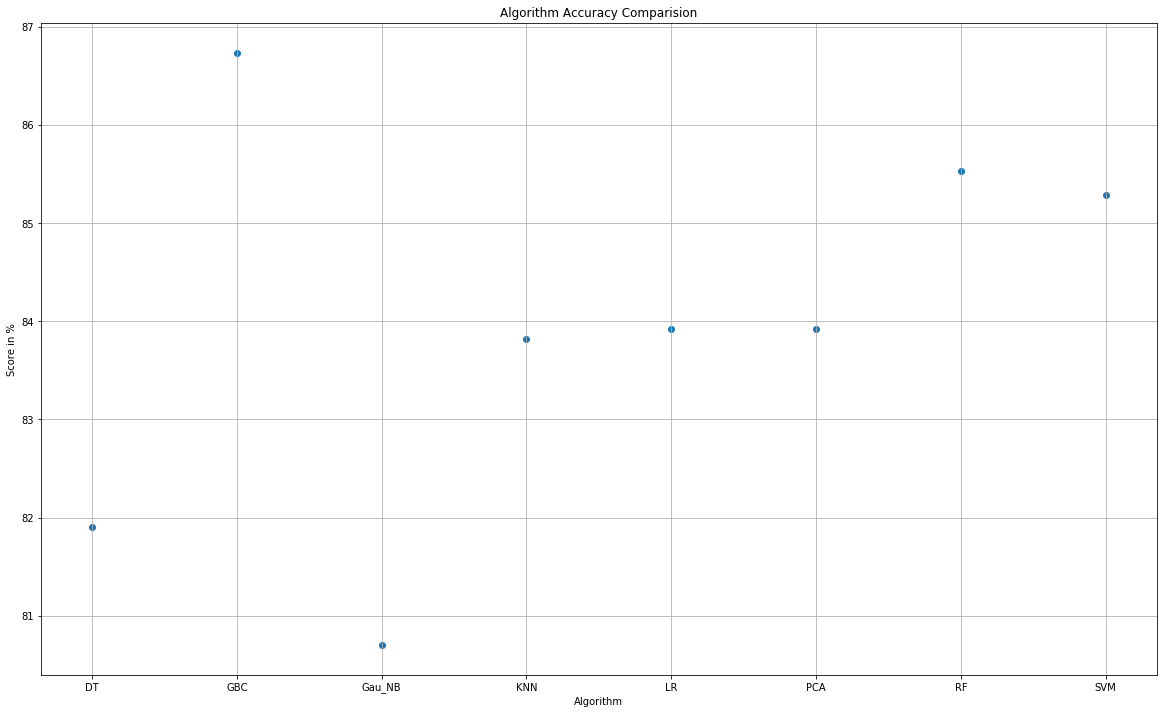

In [152]:
plt.scatter(algoName, accuracyScore)
plt.grid()
plt.title('Algorithm Accuracy Comparision')
plt.xlabel('Algorithm')
plt.ylabel('Score in %')
plt.show()

# Conclusion: so, we get a maximum of 86.7 % accuracy via Ensemble Gradient Boosting Classifier Model